In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
datasets_names = [dataset_name for dataset_name in os.listdir("predictions") if dataset_name.endswith("xlsx")]
datasets_names

['vit_inference_experimento1 images.xlsx',
 'vit_inference_experimento3 images.xlsx',
 'vit_inference_experimento2 images.xlsx',
 'vit_inference_experimento5 images.xlsx',
 'vit_inference_experimento4 images.xlsx']

In [ ]:
# df = pd.DataFrame()

# for dataset_name in datasets_names:
#     current_df = pd.read_excel(f"predictions/{dataset_name}")
#     df = pd.concat([df, current_df])
# df

,experimento,image,N,K,T,H,J2,id,label
0,experimento1 images,skyrmionsPlot N = 547 J2 = 0.5303030303030303 ...,547,0.1,0.01,2.121212,0.530303,0,F
1,experimento1 images,skyrmionsPlot N = 547 J2 = 0.5606060606060606 ...,547,0.1,0.01,0.757576,0.560606,0,F
2,experimento1 images,skyrmionsPlot N = 547 J2 = 0.4575757575757576 ...,547,0.1,0.01,0.272727,0.457576,0,F
3,experimento1 images,skyrmionsPlot N = 547 J2 = 0.7424242424242424 ...,547,0.1,0.01,2.090909,0.742424,0,F
4,experimento1 images,skyrmionsPlot N = 547 J2 = 0.6333333333333333 ...,547,0.1,0.01,2.484848,0.633333,0,F
...,...,...,...,...,...,...,...,...,...
9995,experimento4 images,skyrmionsPlot N = 547 J2 = 0.3787878787878788 ...,547,0.1,0.01,1.727273,0.378788,0,F
9996,experimento4 images,skyrmionsPlot N = 547 J2 = 0.706060606060606 K...,547,0.1,0.01,0.848485,0.706061,1,Pm
9997,experimento4 images,skyrmionsPlot N = 547 J2 = 0.4757575757575758 ...,547,0.1,0.01,1.606061,0.475758,0,F
9998,experimento4 images,skyrmionsPlot N = 547 J2 = 0.5242424242424243 ...,547,0.1,0.01,0.757576,0.524242,0,F


# Grafico por experimentos

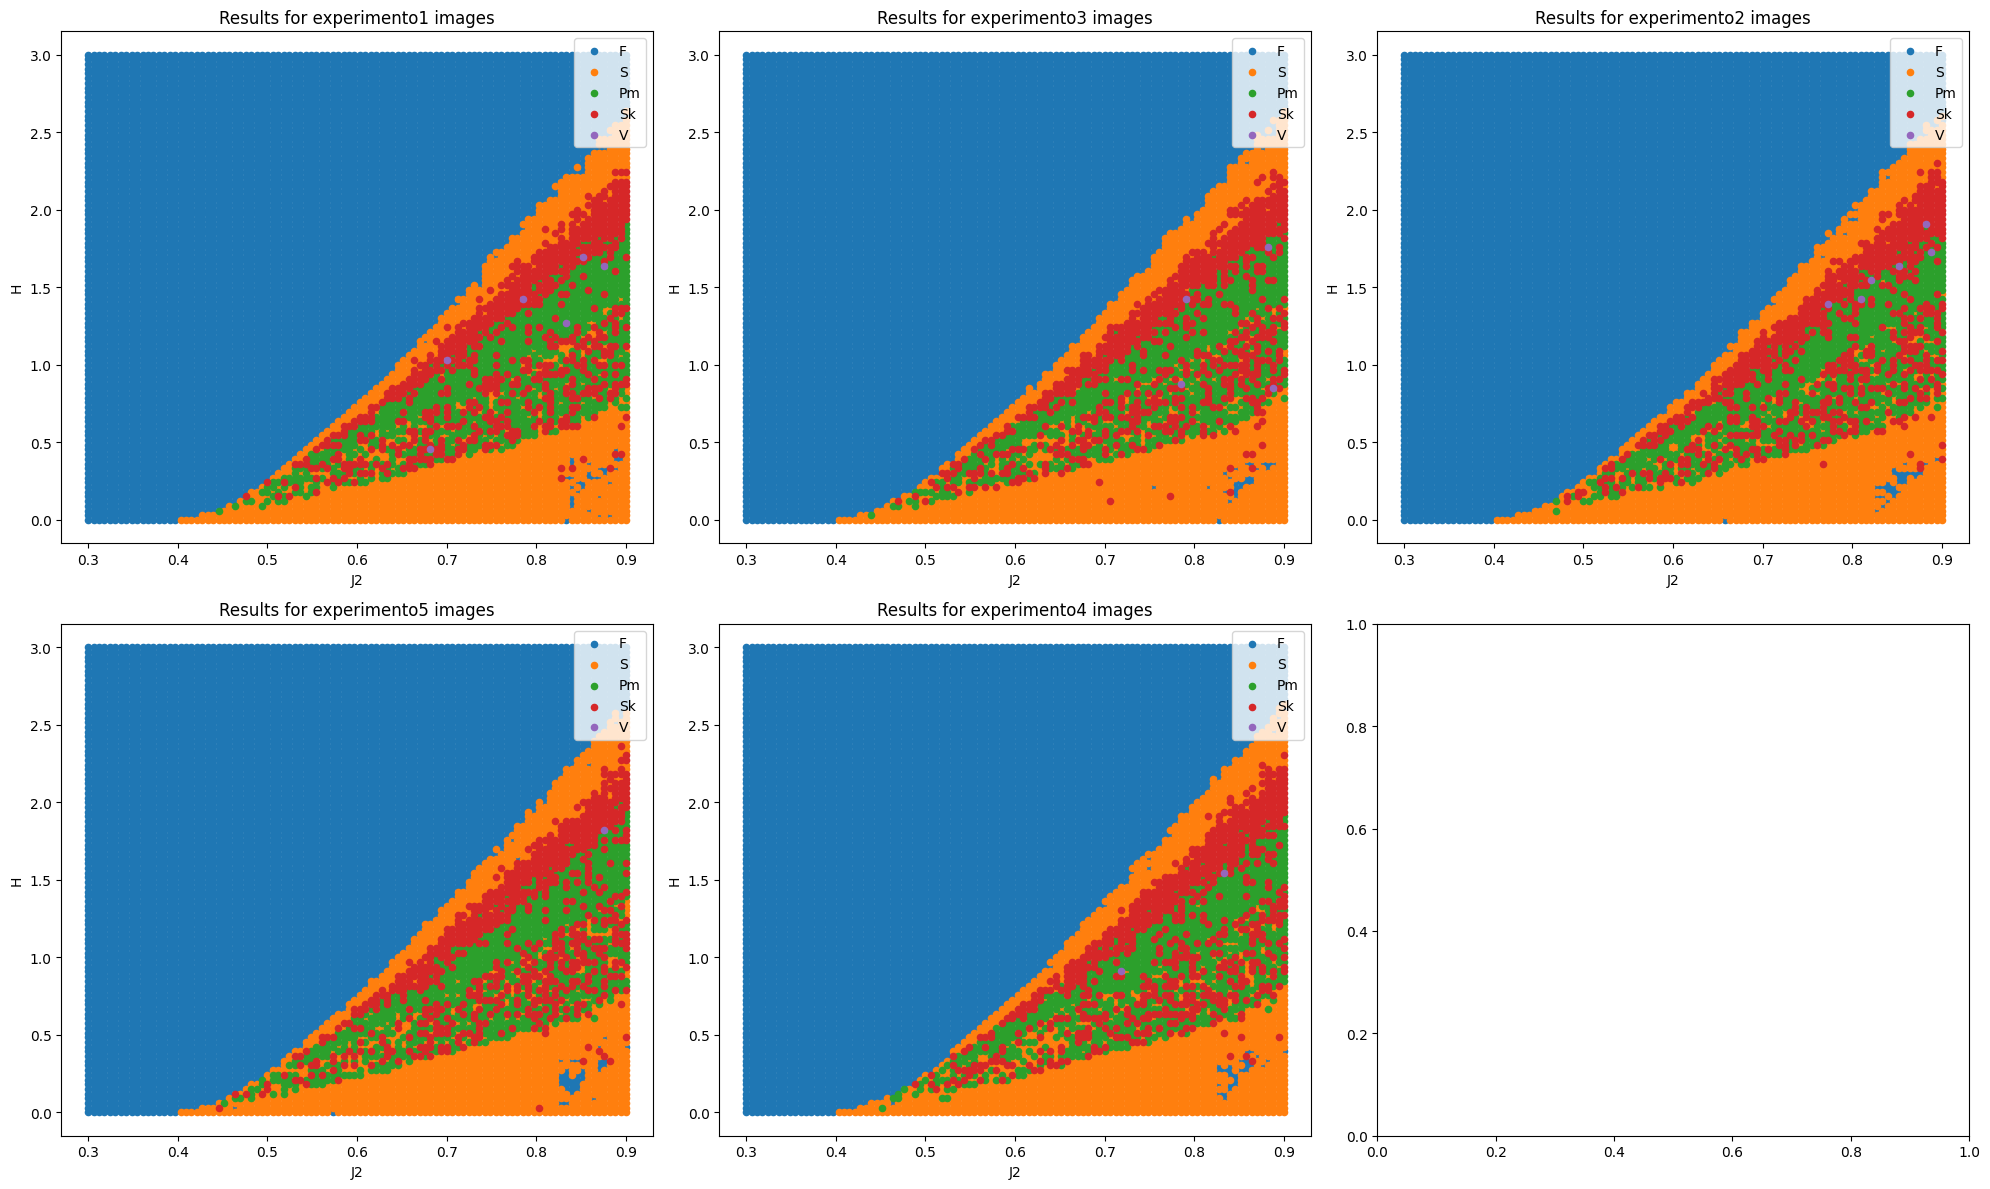

In [22]:
# 1. Create the figure and a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(20, 12))

# 2. Get the unique experiment names
experiments = df["experimento"].unique()

# 3. Iterate over the experiments and their index
for i, exp in enumerate(experiments):
    # Select the data for the current experiment
    ddf = df[df["experimento"] == exp]

    # Calculate the row and column index for the current subplot
    # Row index: i // 3 (integer division by the number of columns)
    # Column index: i % 3 (remainder after division by the number of columns)
    row = i // 3
    col = i % 3

    # Select the correct subplot from the ax array
    current_ax = ax[row, col]

    for label, count in ddf['label'].value_counts( ascending=False).items():
        subset = ddf[ddf['label'] == label]
        current_ax.scatter(subset['J2'], subset['H'], label=label, s=20)

    # Add a title to the subplot
    current_ax.set_title(f"Results for {exp}")
    
    # Add axis labels (optional, can be better handled outside the loop)
    current_ax.set_xlabel("J2")
    current_ax.set_ylabel("H")
    current_ax.legend()

# 4. Optional: Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# 5. Show the figure
plt.show()


# Grafico todos los experimentos

In [25]:
df['label'].value_counts( ascending=False)

label
F     34441
S      7519
Pm     4410
Sk     3611
V        19
Name: count, dtype: int64

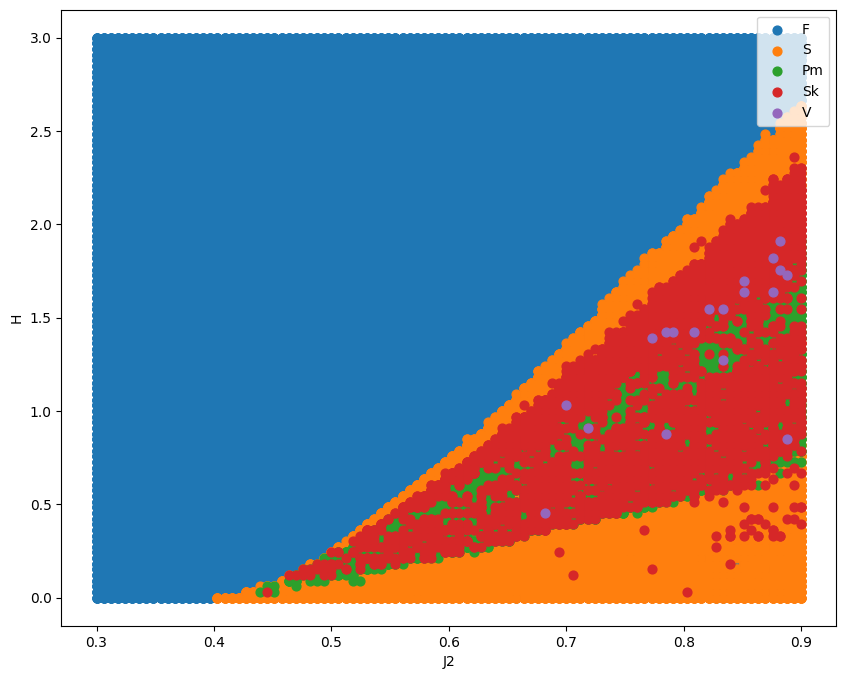

In [26]:
plt.figure(figsize=(10, 8))


for label, count in df['label'].value_counts( ascending=False).items():
    subset = df[df['label'] == label]
    plt.scatter(subset['J2'], subset['H'], label=label, s=40)
    
plt.xlabel('J2')
plt.ylabel('H')

plt.legend()
plt.show()

# Subplots por clase identificada

In [50]:
df['label'].unique()

array(['F', 'Sk', 'Pm', 'S', 'V'], dtype=object)

In [51]:
colors ={
    "F":"blue",
    "Sk":"red",
    "S":"orange",
    "Pm":"green",
    "V":"purple"
}
colors

{'F': 'blue', 'Sk': 'red', 'S': 'orange', 'Pm': 'green', 'V': 'purple'}

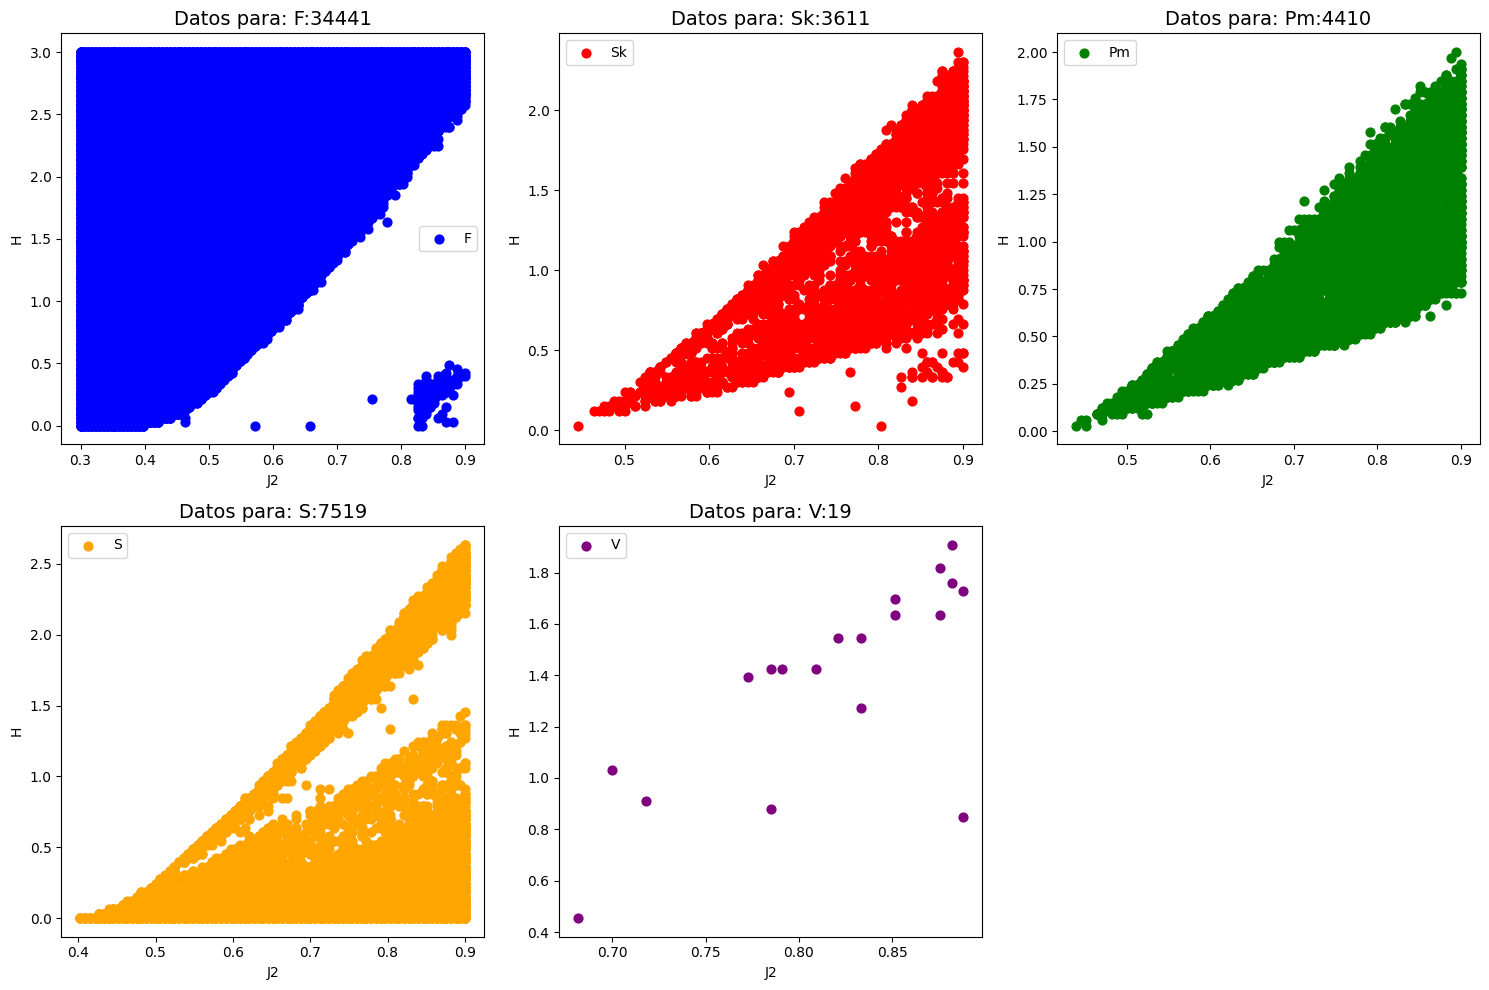

In [52]:
# 1. Create the figure and a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10)) # Reduje el figsize para que sea más estándar

# 2. Obtener los labels únicos y usarlos para iterar (los Value Counts no son necesarios aquí)
unique_labels = df['label'].unique()

# 3. Iterate over the labels and their index (CORRECCIÓN CLAVE: Usar enumerate)
for i, label in enumerate(unique_labels):
    
    # Detener la iteración si el número de subplots (6) se ha alcanzado
    if i >= 6:
        print("Advertencia: Se han graficado los primeros 6 labels. Ignorando el resto.")
        break
        
    # Select the data for the current label
    ddf = df[df["label"] == label]

    # Calculate the row and column index for the current subplot
    # Row index: i // 3 (integer division by the number of columns)
    # Column index: i % 3 (remainder after division by the number of columns)
    row = i // 3
    col = i % 3

    # Select the correct subplot from the ax array
    current_ax = ax[row, col]
    
    # ------------------ PLOT ------------------
    current_ax.scatter(ddf['J2'], ddf['H'], label=label, s=40,c=colors[label])
    
    # Add a title based on the label
    current_ax.set_title(f"Datos para: {label}:{len(ddf)}", fontsize=14)
    current_ax.set_xlabel("J2")
    current_ax.set_ylabel("H")
    current_ax.legend(loc='best') # Usar 'loc=best' para optimizar la posición

# 4. Limpieza del subplot sobrante (si hay menos de 6 labels)
total_plots = len(unique_labels)
if total_plots < 6:
    for j in range(total_plots, 6): # Itera desde el último plot usado hasta el 6
        # Calcula la posición del subplot a apagar
        row = j // 3
        col = j % 3
        ax[row, col].axis('off')

# 5. Optional: Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# 6. Show the figure
plt.show()

# Grafico por  la clase mas indentificada en cada punto

In [57]:
with open('classes/id2label_vit.json', 'r') as f:
    id2label = json.load(f)

with open('classes/label2id_vit.json', 'r') as f:
    label2id = json.load(f)

In [58]:
id2label = {int(i):k for i, k in id2label.items()}
id2label

{0: 'F', 1: 'Pm', 2: 'S', 3: 'Sk', 4: 'V'}

In [59]:
df_moda = df.groupby(['J2', 'H'])['id'].agg(
    moda_id=lambda x: x.mode().iloc[0]
).reset_index()

df_moda['label'] = df_moda['moda_id'].map(id2label)
df_moda

,J2,H,moda_id,label
0,0.3,0.000000,0,F
1,0.3,0.030303,0,F
2,0.3,0.060606,0,F
3,0.3,0.090909,0,F
4,0.3,0.121212,0,F
...,...,...,...,...
9995,0.9,2.878788,0,F
9996,0.9,2.909091,0,F
9997,0.9,2.939394,0,F
9998,0.9,2.969697,0,F


In [60]:
df_moda["label"].value_counts()

label
F     6875
S     1475
Pm    1089
Sk     561
Name: count, dtype: int64

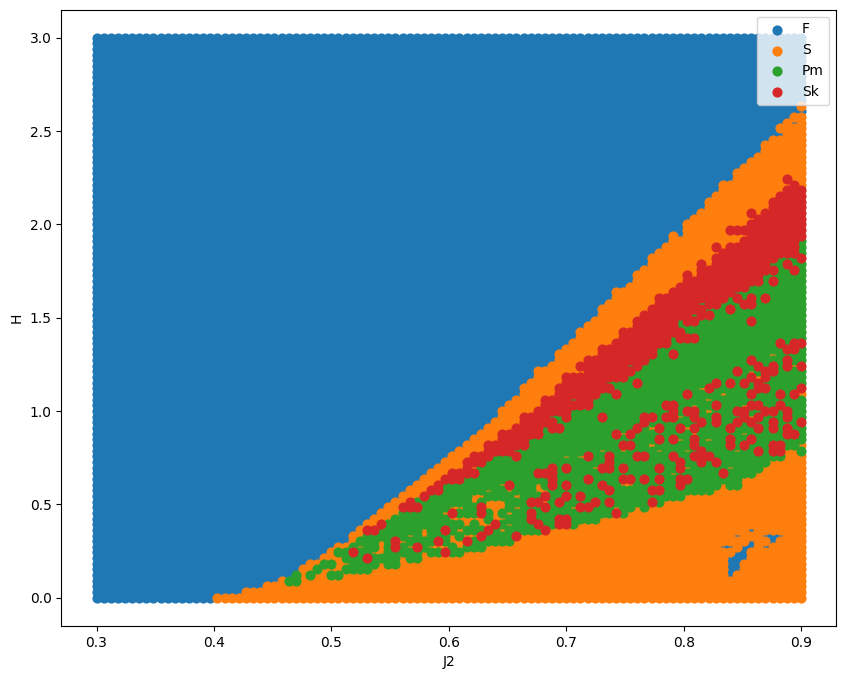

In [61]:
plt.figure(figsize=(10, 8))

for label, count in df_moda['label'].value_counts( ascending=False).items():
    subset = df_moda[df_moda['label'] == label]
    plt.scatter(subset['J2'], subset['H'], label=label, s=40)
    
plt.xlabel('J2')
plt.ylabel('H')

plt.legend()

# Heatmap

In [47]:
heatmap_data = df_moda.pivot_table(
    index='H',          # Eje Y del heatmap
    columns='J2',       # Eje X del heatmap
    values='moda_id'    # Valores que determinan el color
)

heatmap_data = heatmap_data.sort_index(ascending=False)
heatmap_data

J2,0.300000,0.306061,0.312121,0.318182,0.324242,0.330303,0.336364,0.342424,0.348485,0.354545,...,0.845455,0.851515,0.857576,0.863636,0.869697,0.875758,0.881818,0.887879,0.893939,0.900000
H,,,,,,,,,,,,,,,,,,,,,
3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.969697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.939394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.878788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.121212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
0.060606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


<Axes: xlabel='J2', ylabel='H'>

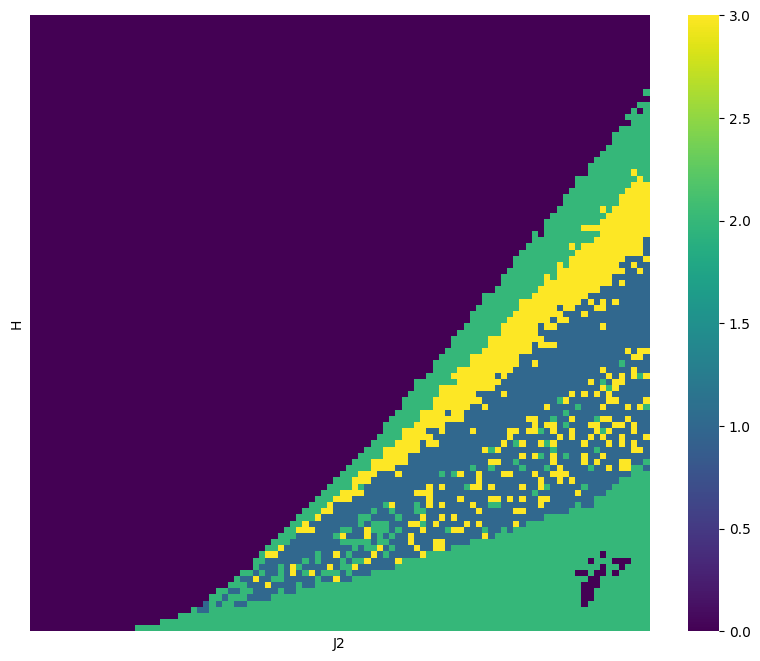

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data,xticklabels=False, yticklabels=False,cmap="viridis")